## Summary Results

In [1]:
from utils.all_imports import *;
%matplotlib inline

# Set seed for notebook repeatability
np.random.seed(0)
# READ INPUT DATASET
# =========================================================================== #
dataset_path, dataset_name, column_names, TARGET_COL = get_dataset_location()
estimators_list, estimators_names = get_estimators()
dataset, feature_vs_values = load_brdiges_dataset(dataset_path, dataset_name)
columns_2_avoid = ['ERECTED', 'LENGTH', 'LOCATION']
# Make distinction between Target Variable and Predictors
# --------------------------------------------------------------------------- #
rescaledX, y, columns = prepare_data_for_train(dataset, target_col=TARGET_COL)

None
Summary about Target Variable {target_col}
--------------------------------------------------
2    57
1    13
Name: T-OR-D, dtype: int64
shape features matrix X, after normalizing:  (70, 11)


In [2]:
# Parameters to be tested for Cross-Validation Approach
# -----------------------------------------------------
param_grids = []
parmas_logreg = {
    'penalty': ('l1', 'l2', 'elastic', None),
    'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
    'fit_intercept': (True, False),
    'tol': (1e-4, 1e-3, 1e-2),
    'class_weight': (None, 'balanced'),
    'C': (10.0, 1.0, .1, .01, .001, .0001),
    # 'random_state': (0,),
}; param_grids.append(parmas_logreg)

parmas_knn_clf = {
    'n_neighbors': (2,3,4,5,6,7,8,9,10),
    'weights': ('uniform', 'distance'),
    'metric': ('euclidean', 'minkowski', 'manhattan'),
    'leaf_size': (5, 10, 15, 30),
    'algorithm': ('ball_tree', 'kd_tree', 'brute'),
}; param_grids.append(parmas_knn_clf)

params_sgd_clf = {
    'loss': ('log', 'modified_huber'), # ('hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron')
    'penalty': ('l2', 'l1', 'elasticnet'),
    'alpha': (1e-1, 1e-2, 1e-3, 1e-4),
    'max_iter': (50, 100, 150, 200, 500, 1000, 1500, 2000, 2500),
    'class_weight': (None, 'balanced'),
    'learning_rate': ('optimal',),
    'tol': (None, 1e-2, 1e-4, 1e-5, 1e-6),
    # 'random_state': (0,),
}; param_grids.append(params_sgd_clf)

kernel_type = 'svm-rbf-kernel'
params_svm_clf = {
    # 'gamma': (1e-7, 1e-4, 1e-3, 1e-2, 0.1, 1.0, 10, 1e+2, 1e+3, 1e+5, 1e+7),
    'gamma': (1e-5, 1e-3, 1e-2, 0.1, 1.0, 10, 1e+2, 1e+3, 1e+5),
    'max_iter':(1e+2, 1e+3, 2 * 1e+3, 5 * 1e+3, 1e+4, 1.5 * 1e+3),
    'degree': (1,2,4,8),
    'coef0': (.001, .01, .1, 0.0, 1.0, 10.0),
    'shrinking': (True, False),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid',],
    'class_weight': (None, 'balanced'),
    'C': (1e-4, 1e-3, 1e-2, 0.1, 1.0, 10, 1e+2, 1e+3),
    'probability': (True,),
}; param_grids.append(params_svm_clf)

parmas_tree = {
    'splitter': ('random', 'best'),
    'criterion':('gini', 'entropy'),
    'max_features': (None, 'sqrt', 'log2'),
    'max_depth': (None, 3, 5, 7, 10,),
    'splitter': ('best', 'random',),
    'class_weight': (None, 'balanced'),
}; param_grids.append(parmas_tree)

parmas_random_forest = {
    'n_estimators': (3, 5, 7, 10, 30, 50, 70, 100, 150, 200),
    'criterion':('gini', 'entropy'),
    'bootstrap': (True, False),
    'min_samples_leaf': (1,2,3,4,5),
    'max_features': (None, 'sqrt', 'log2'),
    'max_depth': (None, 3, 5, 7, 10,),
    'class_weight': (None, 'balanced', 'balanced_subsample'),
}; param_grids.append(parmas_random_forest)

# Some variables to perform different tasks
# -----------------------------------------------------
N_CV, N_KERNEL, N_GS = 9, 5, 6;
nrows = N_KERNEL // 2 if N_KERNEL % 2 == 0 else N_KERNEL // 2 + 1;
ncols = 2; grid_size = [nrows, ncols]

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Summary Tables about Analyses done by means of different number of included Pricipal Components

In [4]:
# df_9_, df_12_ = reshape_dfs_acc([df_9, df_12], num_col=N_KERNEL, n_cp_list=[9, 11])

# res = create_widget_list_df_vertical([df_9_, df_9_auc]); display.display(res)
# res = create_widget_list_df_vertical([df_12_, df_12_auc]); display.display(res)

### Summary Test

Here, in the following section I'm going to emulate a test in which I will test the different possible kinds of kernel trick, in other sense techniques, available for a Principal Component Analysis, shortly PCA, unsupervised statistical learning technique in order to remap the original features into a new N-dimensional reference system by means of the kernel approach adopted during the computation.

Once the new N-dimensional feature space is available and ready, I will experiment a bounch of selected machine learning methods and procedures applied directly on the first two most informative principal components, that is, also referred to as PCA1 and PCA2, respectively, in order to display a sequence of decision boundaries and contours retrieved after having runned each method on the selected dataset, which has been divided into halves, ofd the same size, and with the same proportion of the two classes of the target variable.

What follows is the related code, to the desciption given just above, and the results are also available through several rows of images that represent the contour and decision boundaries obtained thank to the several combinations of PCA's kernel trick and machine learning method for fitting a classifier:

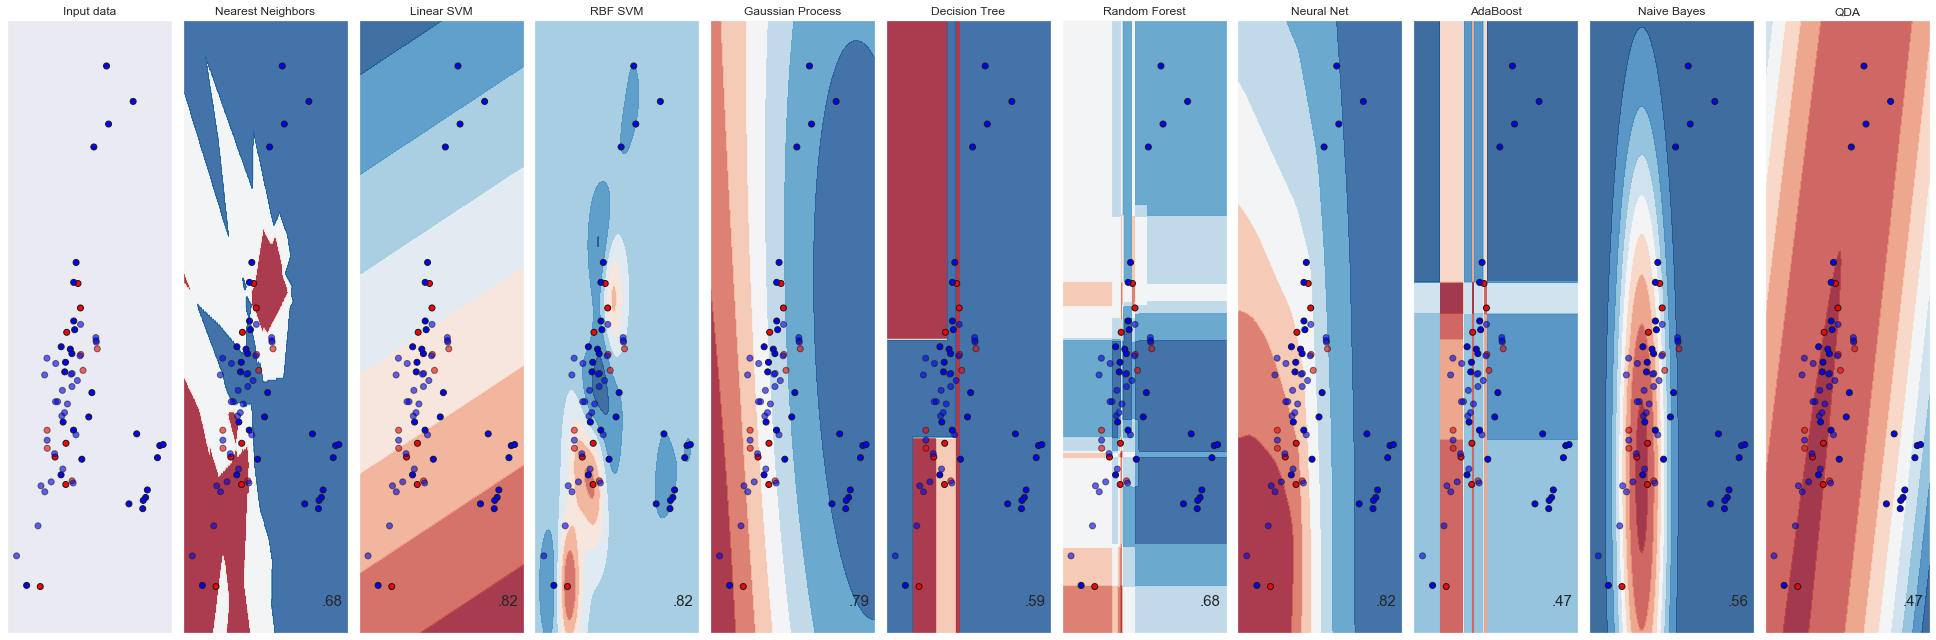

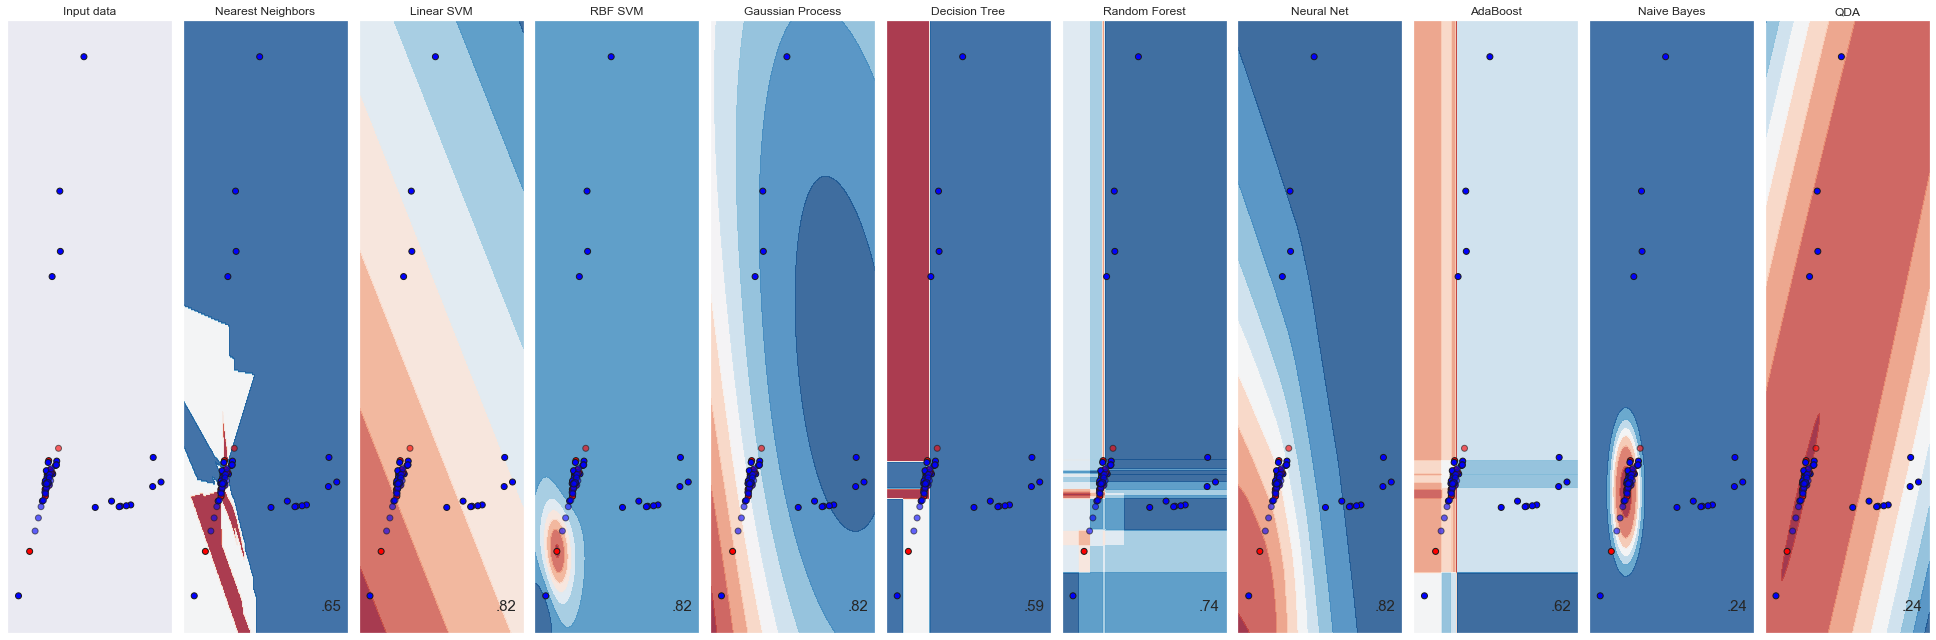

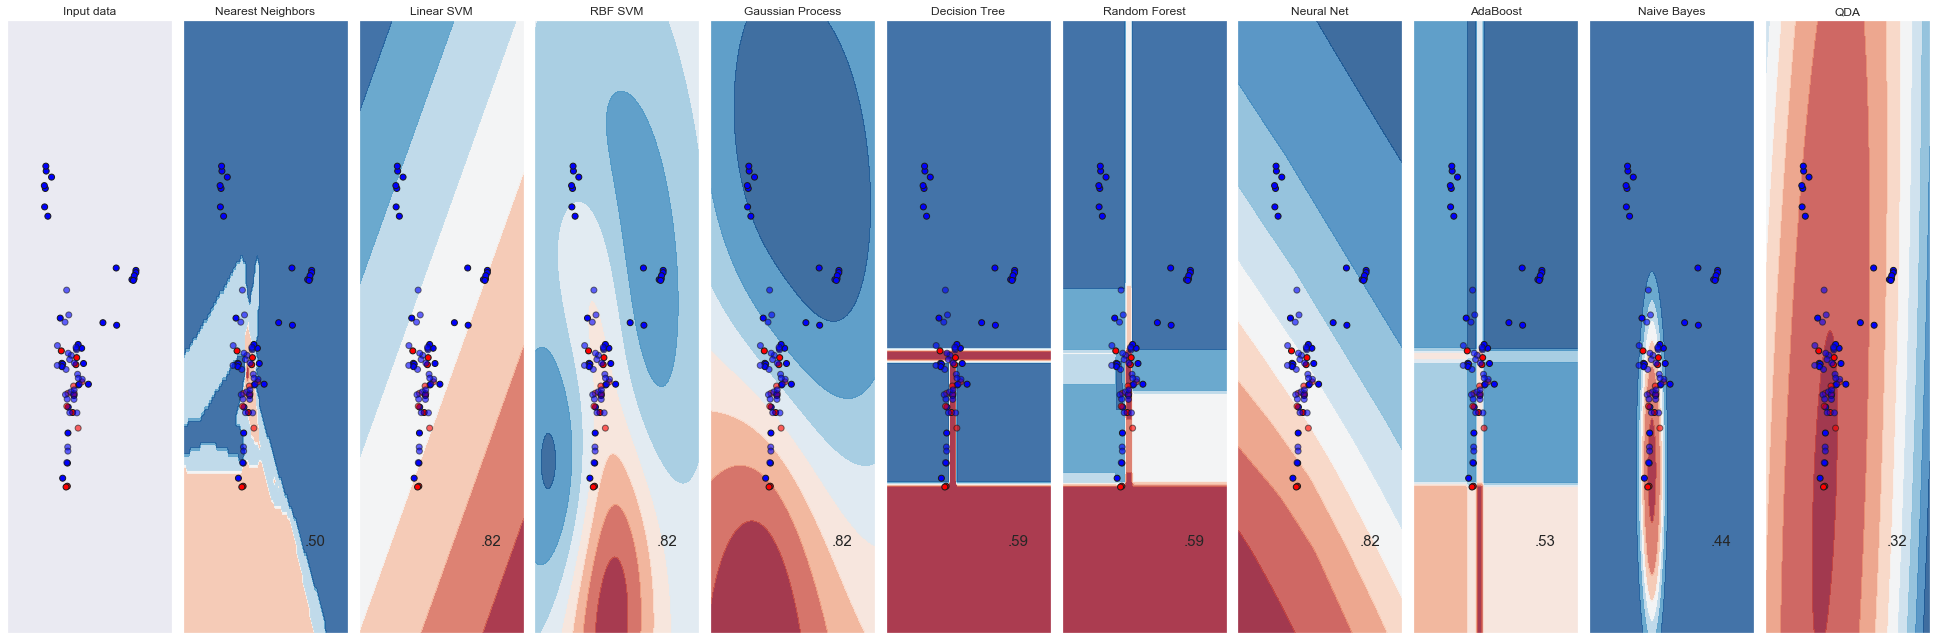

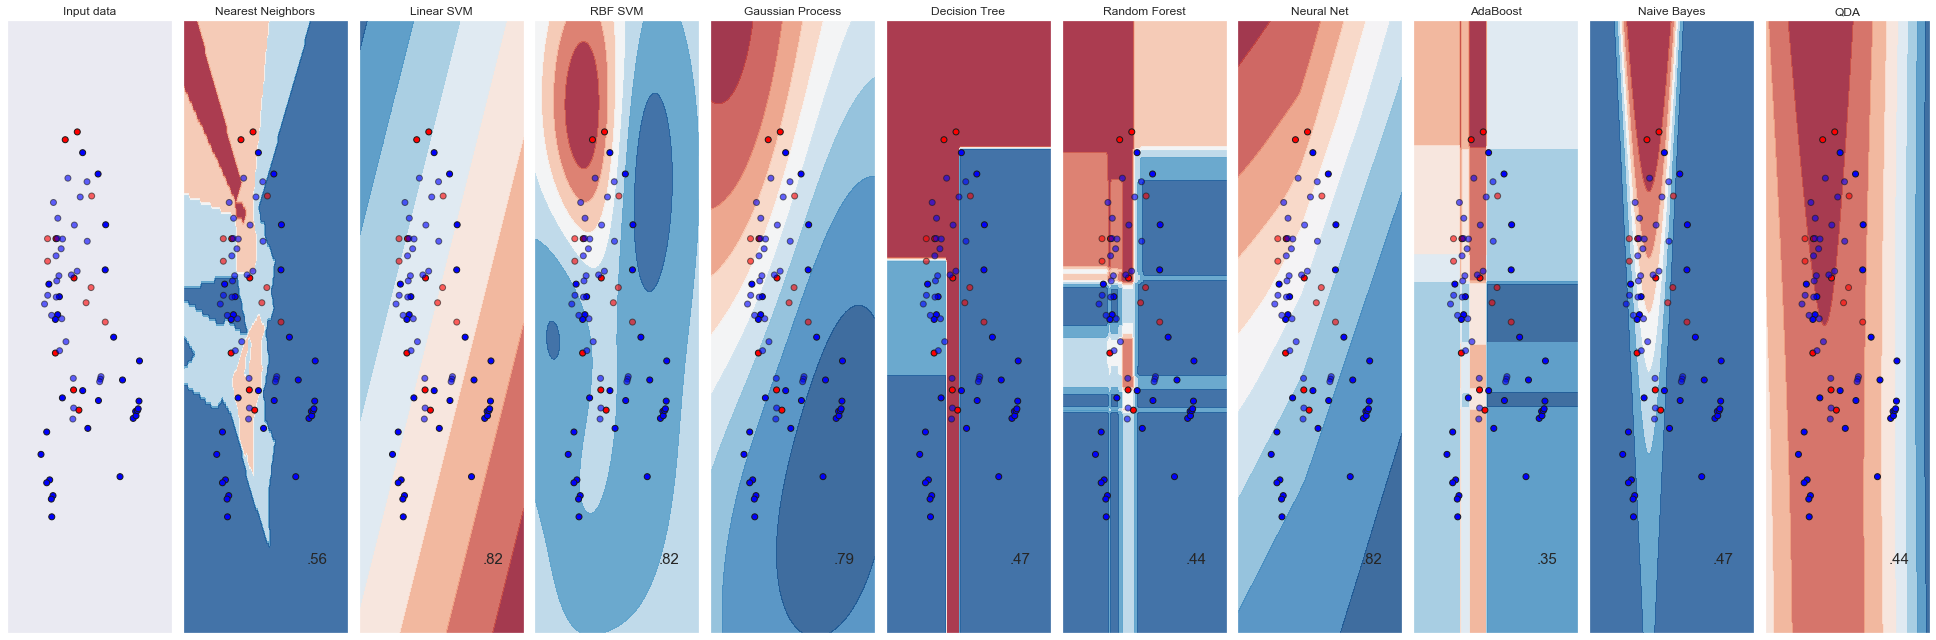

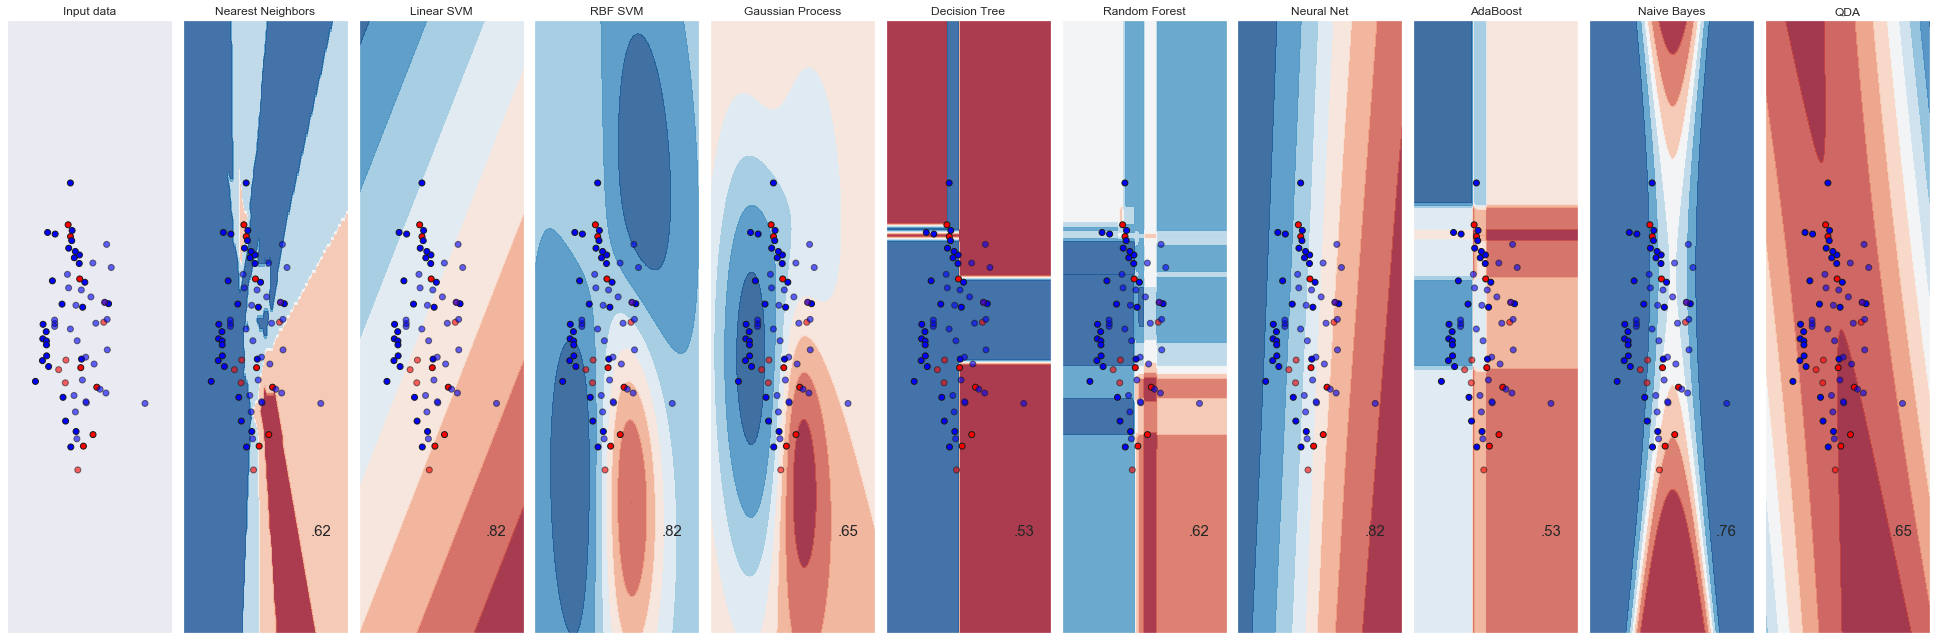

In [5]:
kernel_pca = ['linear', 'poly', 'rbf', 'cosine', 'sigmoid'] # linear, poly, rbf, sigmoid, cosine, precomputed
scaler_techniques = ['StandardScaler', 'Normalize', 'MinMaxScaler']
X = rescaledX
# Trying only StandardScaler approach
err_list = classifier_comparison_by_pca_kernels(X, y, start_clf=0, stop_clf=10, scaler_technique=scaler_techniques[0], straitified_flag=True, kernels_pca_list=kernel_pca[:], figsize=(27, 9), by_pairs=False, singles=False, verbose=0, record_errors=True, avoid_func=False,)

Describing the several pictures we have obtained throughout the combination of kernel tricks available for kernelPCA technique together with different supervised machine learning techniques for building classifiers and models, we can end up saying what follows.

Looking at the first picture of each row of graphs, that is those pictures showing just data points witout any kind of decision regions as well as decision boundaries, what we understand is that the data points that are the data examples will group creating different shapes accordingly to the kind of kernel trick adopted for kernelPCA method, in particular, we can immediately see that the two categories, where blue points stands for THROUGH-like bridges while red points for DECK-like bridges, are not equally in numbers, but blue points are the greater among the two, moreover the two categories does not seem to seaprate very well but the picture is crowded with both types of categories that are strctlu closed one another. More precisely we can see that:
- using *linear* kernel trick for kernelPCA procedure data points seem to be widely spread along vertical axis, and group mostly near the center of the picutre;
- using *poly* kernel trick for kernelPCA procedure instead data points are mostly clusterd near the left bottom corner where seem to form a straight line and there are few examples on the upper side and some less points on the right side of the sdame picture;
- while using *rbf* kernel trick for kernelPCA procedure data points seem to spread as the data points represented in the first picture so in the middle of the area but are tightly related so that are less spread along the horizontal axis;
- when exploiting *cosine* kernel trick for kernelPCA method the data points are widely spread and tend to reach the top of the picture;
- fianlly, when adopting *sigmoid* kernel trick for kernelPCA we can see that data points are mostly clusterd in the center of the graph.

Speaking about decision boundaries and decision regions about the selected and fitted to the data machine learning methods, what we can say is the following:
- Looking at **Nearest-Neighbor Method** graphs for describing decision boundaries and decision regions we notice that in the majority of cases the decision boundaries and decision regions are prominent for the THROUGH-like bridges, sometimes the area referring to DECK-like samples are sourranded by the decision regions of the other class and the transition to the two decision boundaries is very sharp, not easilly describable.
- While, looking at **Linear SVM Classifier**, and knowing the fact that we are fitting a linear classifier to the data, we are aware and so it's clear that the expected decision regions follow a pattern made from several strips of shifting shades of colors from dark red to dark blue. More precisely, three out of five Linear Svm classifiers, in paritcular those that correspond to classifiers fitted when kernel trick for Kernel PCA was set to *'rbf', 'cosine', 'sigmoid'* respectively and one at a time, show more or less the same pattern, so this classification technique combined with these kernel tricks for KernelPCA seems to behave more or less at the same way. Instead Liner Svm combined with poly kernel trick seems to lead the classifier and the resulting decisin boundaries to follow a symmetric patter with respect to the vertical axis. Finally the first combination of KernelPca and Linear Svm technique, that is linear kernel trick plus linear svm, leads to a less aggressive or finer slope of the linear decision regions. We can end up saying that in the majority of cases the transition from one extreme or edge to the other of the shade of color is smoother and continue with respect to the Nearest-Neighbor Approach.
- Speaking about **RBF kernel SVM** combined with a preprocessed datset with the various kernel tricks for kernelPca Procedure we can observe that the attempt of finding decision regions on one side advantages the more numerous class that is the class corresponding to those data points classified as THROUGH-like bridges, while penalize the other which is referred to smaller region. However it seems that the classifieris able to correctly classify the data points corresponding to the less numerous class while the data points of the other class sometimes are misclassified more frequently.
- Looking at classifiers trained by means of **Gaussian Process technique** we can ascertain that decision boundaries and decision regions seem to follow a straight pattern where the data points are mixing the most, while far from the bigger cluster of points that come from both categories the decison boundaries are assuming higher order so that resemble smooth nonlinear curves. In particular while in all other cases the blue region seems to occupy the left side of the graph, sometimes near the bottom and other times near the top-right, for Gaussian Process technique combined with sigmoid kernel trick for kernelPca procedure we observe that the pattern observed above is the opposite.
- Even if these three methods have different characteristics they seems to lead to or provide more or less, and somehow, resulting decision boundaries and decision regions that follow a similar nature that is regions obtained dividing the available two-dimensional plane into subregions that corresponds to square regioons or alternatively irregular regions that are not corresponding to some kind of curve but rather to segmentation of the available area. These methods are respectively **Deciosn Trees, Random Forests, and Adabosts**. Where the two latter can be seen as a improvement of Decsion Tree because often the two latter are based on the decision tree classifier as unit of the overall classifier as are generally described Random Forests, and AdaBost. However Adabost and Random Forests seem to beahve more or less in the same way, in the sense that both show a predominance of reagins and subregions linked to the THROUGH class, even if the transition from one region to the other is mcuh smoother than the transition of the Decision Tree based models.
- The **Niave Bayes Classifier**, when applied to the data points once preprocessed using one at a time all the suggested kernel tricks for kernelPca method as a classifier technique, leads to a results in terms of decision boundaries and regions that vary the most from one kernel trick to the other. In particular using the first three proposed kernel tricks that are 'linear', 'poly', 'rbf' the decison regions connected to the Deck-like bridges are concentric with respect to the surrounding area that instead is widely associated to the other class that is THROUGH-like bridges. More Precisely for 'linear' kernel the resulting decision boundaries are wide and spread along the vertical axis instead for 'poly', 'rbf' tend to be narrowe and to be located near the bottom of the graphic. Instead looking at the graphic that referes to the data points when preprocessed by means of cosine kenrel trick for kernelPca method we notice that it seems to lead to a opposite or simmetryc graphic with respect to the horizontal axis when compared with the graphic obtained by means of linear kernel trick. Lastly the sigmoid kernel trick leads to a graphic that seems to classifies data points from THROUGH class associating them to the left and right sides of the piciture while the top and bottom centered horizontal strip seems to be associated with data points from DECK class and more precisely the dark red areas are spotted mosty near either the top or bottom areas.
- The last classifier proposed for this thiny and rough experiment is he one known as **Quadratic Discriminant Analysis**, or more shortly *QDA*. The resulting graphics suggest us that by means of such technique we observe that the DECK class is the class among the two which affects mostly the models capabilites, since the decision regions are mostly represented by shades of colors that range in the majority of case around the red color, enabling us to summarize that the DECK class differently from other preceding models will be the most frequently predicted class with respect to the other class that is the THROUGH class.

Having performed the analyses discussed just above, employing graphics and so qualitaty approach for investigating some of the most known and exploited methods we can summarize that since we adopt jsut two PCS out of eleven possible components for predicting classes among DECK and THROUGH for T-OR-D dependent variable as our predictive or target variable, is is reallyu difficult to correctly classify all the majority of the data samples since the decisoin bundaries vary heavily from one method to the other also due to the fact that we exploit few information and knwoledge and we cannot find patterns that lead to a more precise classification. We need to exploit more features to reach better performance at classification time and find better decision boundaries that allow to separate the data points without mixing them.

### Improvements and Conclusions <a class="anchor" id="Improvements-and-conclusions"></a>

Extension that we can think of to better improve the analyses we can perform on such a relative tiny dataset many include, for preprocessing phases:
- Selecting different *Feature Extraction ant Dimensionality Reduction Techniques* other than Pca or kernel Pca such as: 
*linear discriminant analysis (LDA)*, or *canonical correlation analysis (CCA) techniques* as a pre-processing step.

Extension that we can think of to better improve the analyses we can perform on such a relative tiny dataset many include, for training phases:

- Selecting different *Ensemble Methods, investigating both Average based and Boosting based Statistical Learning Methods*.

Extension that we can think of to better improve the analyses we can perform on such a relative tiny dataset many include, for diagnostic analyses after having performed train and test phases:

- Using other measures, indicators and ghraphical plots such as the *Total Operating Characteristic (TOC)*, since also such a measure characterizes diagnostic ability while revealing more information than the ROC. In fact for each threshold, ROC reveals two ratios, TP/(TP + FN) and FP/(FP + TN). In other words, ROC reveals hits/(hits + misses) and false alarms/(false alarms + correct rejections). On the other hand, TOC shows the total information in the contingency table for each threshold. Lastly, the TOC method reveals all of the information that the ROC method provides, plus additional important information that ROC does not reveal, i.e. the size of every entry in the contingency table for each threshold.

## References section  <a class="anchor" id="references"></a>
### Main References
- Data Domain Information part:
    - (Deck) https://en.wikipedia.org/wiki/Deck_(bridge)
    - (Cantilever bridge) https://en.wikipedia.org/wiki/Cantilever_bridge
    - (Arch bridge) https://en.wikipedia.org/wiki/Deck_(bridge)
- Machine Learning part:
    - (Theory Book) https://jakevdp.github.io/PythonDataScienceHandbook/
    - (Feature Extraction: PCA) https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
    - (Linear Model: Logistic Regression) https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    - (Neighbor-based Learning: Knn) https://scikit-learn.org/stable/modules/neighbors.html
    - (Stochastc Learning: SGD Classifier) https://scikit-learn.org/stable/modules/sgd.html#sgd
    - (Discriminative Model: SVM) https://scikit-learn.org/stable/modules/svm.html
    - (Non-Parametric Learning: Decsion Trees) https://scikit-learn.org/stable/modules/tree.html#tree
    - (Ensemble, Non-Parametric Learning: RandomForest) https://scikit-learn.org/stable/modules/ensemble.html#forest
- Metrics:
    - (F1-Accuracy-Precision-Recall) https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c
- Statistics:
    - (Correlation and dependence) https://en.wikipedia.org/wiki/Correlation_and_dependence
    - (KDE) https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/
- Chart part:
    - (Seaborn Charts) https://acadgild.com/blog/data-visualization-using-matplotlib-and-seaborn
- Third Party Library:
    - (sklearn) https://scikit-learn.org/stable/index.html
    - (statsmodels) https://www.statsmodels.org/stable/index.html#

    
### Others References
- Plots:
    - (Python Plot) https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python?utm_source=adwords_ppc&utm_campaignid=898687156&utm_adgroupid=48947256715&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=255798340456&utm_targetid=aud-299261629574:dsa-473406587955&utm_loc_interest_ms=&utm_loc_physical_ms=1008025&gclid=Cj0KCQjw-_j1BRDkARIsAJcfmTFu4LAUDhRGK2D027PHiqIPSlxK3ud87Ek_lwOu8rt8A8YLrjFiHqsaAoLDEALw_wcB
- Markdown Math part:
    - (Math Symbols Latex) https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols
    - (CheatSheet) https://www.ibm.com/support/knowledgecenter/SSHGWL_1.2.3/analyze-data/markd-jupyter.html
    - (Tutorial 1) https://share.cocalc.com/share/b4a30ed038ee41d868dad094193ac462ccd228e2/Homework%20/HW%201.2%20-%20Markdown%20and%20LaTeX%20Cheatsheet.ipynb?viewer=share
    - (Tutorial 2) https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html

% ----------------------------------------------------------------------------
% Section 1: Introduction and Descriptive Statistics
% ----------------------------------------------------------------------------
% \input{"./sections/descriptive-statistics/descriptive-statistics-processed"}


% ----------------------------------------------------------------------------
% Section 2: Learning Proces and Kernel-Pca Unsupervised Learning Method
% ----------------------------------------------------------------------------
% \input{"./sections/learning-process/learning-process-processed"}


% ----------------------------------------------------------------------------
% Section 3: Naive Bayes Learning Technique
% ----------------------------------------------------------------------------
% \input{"./sections/naive-bayes/naive-bayes"}


% ----------------------------------------------------------------------------
% Section 3: Naive Bayes Learning Technique
% ----------------------------------------------------------------------------
% \input{"./sections/logistic-regression/logistic-regression"}


% ----------------------------------------------------------------------------
% Section 4: Naive Bayes Learning Technique
% ----------------------------------------------------------------------------
% \input{"./sections/knn-classifier/knn-classifier"}


% ----------------------------------------------------------------------------
% Section 5: Naive Bayes Learning Technique
% ----------------------------------------------------------------------------
% \input{"./sections/sgf-classifier/sgf-classifier"}


% ----------------------------------------------------------------------------
% Section 6: Naive Bayes Learning Technique
% ----------------------------------------------------------------------------
% \input{"./sections/svm-classifier/svm-classifier"}


% ----------------------------------------------------------------------------
% Section 6: Naive Bayes Learning Technique
% ----------------------------------------------------------------------------
% \input{"./sections/decision-trees/decision-trees"}


% ----------------------------------------------------------------------------
% Section 6: Naive Bayes Learning Technique
% ----------------------------------------------------------------------------
% \input{"./sections/random-forests/random-forests"}


% ----------------------------------------------------------------------------
% Section N-th: Learning Proces and Kernel-Pca Unsupervised Learning Method
% ----------------------------------------------------------------------------
% \input{"./sections/conclusions/conclusions-processed"}